# import the Neccessary model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

# Read the data set into a deta Frame 

In [2]:
company = pd.read_csv('C:\\Users\\lenovo\\Downloads\\Company_Data (2).csv')

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
cols_to_drop = ['Age','Education','Price']
company = company.drop(cols_to_drop, axis=1)

In [5]:
company.head(4)

,Sales,CompPrice,Income,Advertising,Population,ShelveLoc,Urban,US
0,9.50,138,73,11,276,Bad,Yes,Yes
1,11.22,111,48,16,260,Good,Yes,Yes
2,10.06,113,35,10,269,Medium,Yes,Yes
3,7.40,117,100,4,466,Medium,Yes,Yes


In [6]:
company.shape

(400, 8)

In [7]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   ShelveLoc    400 non-null    object 
 6   Urban        400 non-null    object 
 7   US           400 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 25.1+ KB


# check null values

<AxesSubplot:>

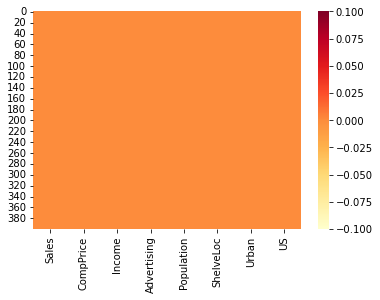

In [8]:
sb.heatmap(company.isnull(),cmap="YlOrRd")

No null values are here

In [9]:
company=company.dropna()

In [10]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,ShelveLoc,Urban,US
0,9.50,138,73,11,276,Bad,Yes,Yes
1,11.22,111,48,16,260,Good,Yes,Yes
2,10.06,113,35,10,269,Medium,Yes,Yes
3,7.40,117,100,4,466,Medium,Yes,Yes
4,4.15,141,64,3,340,Bad,Yes,No


In [11]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   ShelveLoc    400 non-null    object 
 6   Urban        400 non-null    object 
 7   US           400 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 25.1+ KB


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [13]:
company['US']=le.fit_transform(company['US'])

In [14]:
company

,Sales,CompPrice,Income,Advertising,Population,ShelveLoc,Urban,US
0,9.50,138,73,11,276,Bad,Yes,1
1,11.22,111,48,16,260,Good,Yes,1
2,10.06,113,35,10,269,Medium,Yes,1
3,7.40,117,100,4,466,Medium,Yes,1
4,4.15,141,64,3,340,Bad,Yes,0
...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,Good,Yes,1
396,6.14,139,23,3,37,Medium,No,1
397,7.41,162,26,12,368,Medium,Yes,1
398,5.94,100,79,7,284,Bad,Yes,1


In [15]:
company1=pd.get_dummies(company,columns=['ShelveLoc','Urban'],prefix_sep='')

In [16]:
company1.head()

,Sales,CompPrice,Income,Advertising,Population,US,ShelveLocBad,ShelveLocGood,ShelveLocMedium,UrbanNo,UrbanYes
0,9.50,138,73,11,276,1,1,0,0,0,1
1,11.22,111,48,16,260,1,0,1,0,0,1
2,10.06,113,35,10,269,1,0,0,1,0,1
3,7.40,117,100,4,466,1,0,0,1,0,1
4,4.15,141,64,3,340,0,1,0,0,0,1


In [17]:
#data sepreate the x and y
x=company1.drop(['US'],axis=1)
y=company1['US']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

In [19]:
X_train

,Sales,CompPrice,Income,Advertising,Population,ShelveLocBad,ShelveLocGood,ShelveLocMedium,UrbanNo,UrbanYes
250,9.16,137,105,10,435,0,1,0,0,1
63,8.47,119,88,10,170,0,0,1,0,1
312,6.80,137,117,5,337,1,0,0,0,1
159,9.32,119,60,0,372,1,0,0,1,0
283,5.36,135,110,0,112,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
323,10.36,107,105,18,428,0,0,1,0,1
192,7.56,108,26,0,408,0,0,1,1,0
117,8.80,145,53,0,507,0,0,1,0,1
47,4.38,126,98,0,173,1,0,0,0,1


In [20]:
y_train

250    1
63     1
312    1
159    0
283    0
      ..
323    1
192    0
117    0
47     0
172    1
Name: US, Length: 300, dtype: int32

In [21]:
company.shape

(400, 8)

# Model Creation

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

# Model Validation: confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [25]:
y_pred = model.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
cm

array([[21, 10],
       [ 5, 64]], dtype=int64)

In [26]:
test_acc = accuracy_score(y_test,y_pred)
test_acc

0.85

In [27]:
y_pred1 = model.predict(X_train)
train_acc = accuracy_score(y_train,y_pred1)
train_acc

1.0

# Bulid Decision Tree Classifire

In [28]:
from sklearn import tree 
company_clf = tree.DecisionTreeClassifier(max_depth=5) #bulid
company_clf.fit(X_train,y_train) #Train

company_clf.score(X_test,y_test) #make prediction

y_pred =company_clf.predict(X_test)
company_clf.score(X_test,y_test)

0.86

In [29]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1])

In [30]:
company_clf.score

<bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=5)>

# Hyperparameter Tuning: Grid Search

In [31]:
from sklearn.model_selection import KFold,GridSearchCV

In [32]:
model2 = RandomForestClassifier()

fold = KFold(n_splits=6)

param = {"n_estimators":[20,40,60,80,100],"criterion":["gini","entropy"],"max_depth":[None,6,8,10]}

grid = GridSearchCV(estimator=model2,param_grid=param,cv=fold)

In [33]:
grid_result = grid.fit(x,y)

In [34]:
grid_result.best_score_

0.9025327905924921

In [35]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 20}

# Final Model

In [36]:
final_model = RandomForestClassifier(criterion="entropy",max_depth=6,n_estimators=40)

In [37]:
final_model.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=40)

In [38]:
y_pred = final_model.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[24,  7],
       [ 4, 65]], dtype=int64)

In [39]:
accuracy_score(y_test,y_pred)

0.89

# classification_report

In [40]:
from sklearn.metrics import classification_report
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        31
           1       0.90      0.94      0.92        69

    accuracy                           0.89       100
   macro avg       0.88      0.86      0.87       100
weighted avg       0.89      0.89      0.89       100

